# Using Mglearn for visualization

In [ ]:
import sklearn
from sklearn import datasets
from IPython.display import display 
import numpy as np 
import pandas as pd 
import mglearn
import matplotlib.pyplot as plt 
%matplotlib inline 

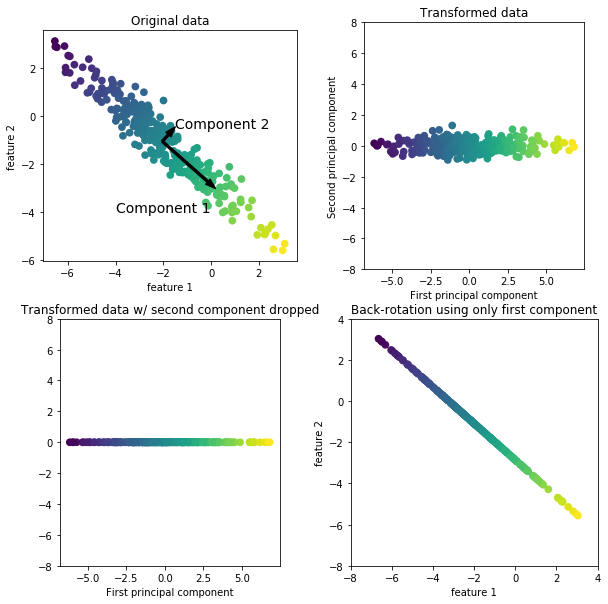

In [4]:
mglearn.plots.plot_pca_illustration()

In [5]:
import numpy as np

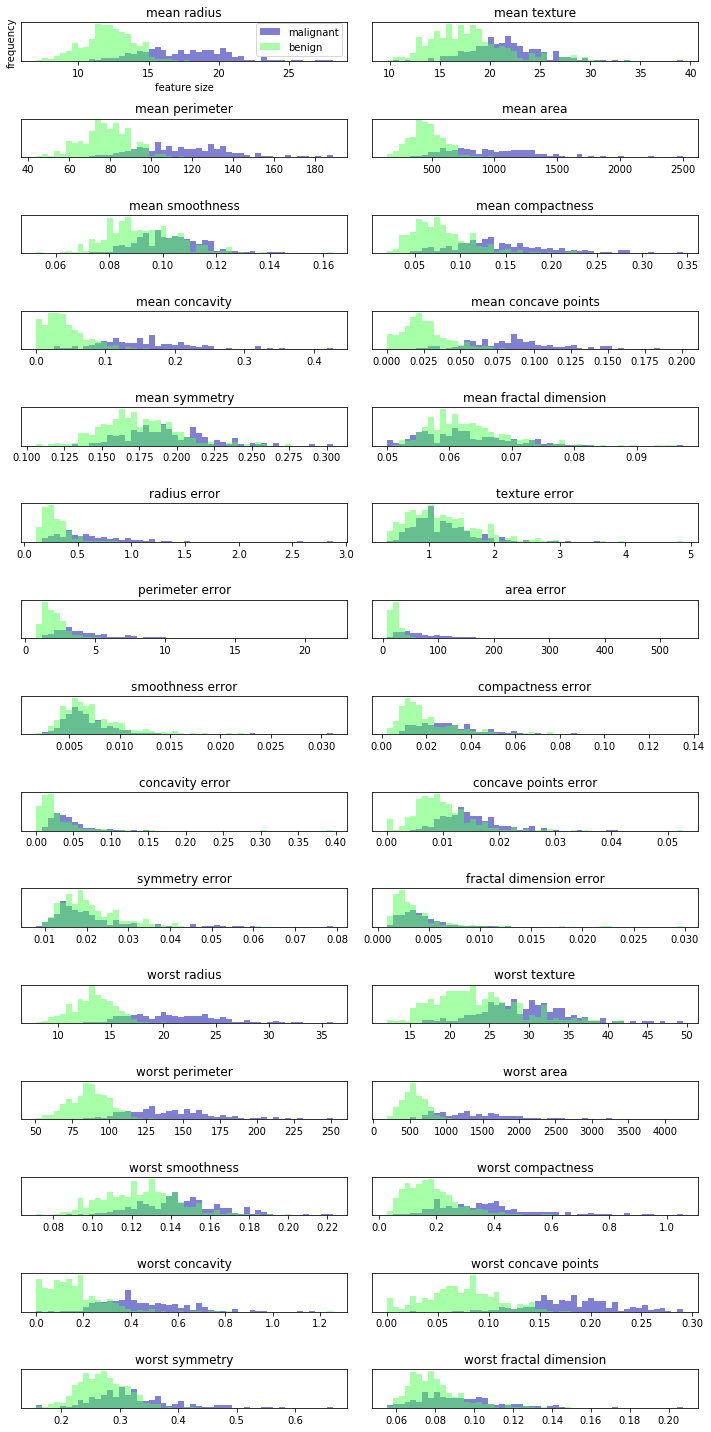

In [17]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30): 
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(()) 
ax[0].set_xlabel("feature size") 
ax[0].set_ylabel("frequency") 
ax[0].legend(["malignant", "benign"], loc="best") 
fig.tight_layout()

In [16]:
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print(cancer.data.shape)

scaler = StandardScaler() 
scaler.fit(cancer.data) 
X_scaled = scaler.transform(cancer.data)

(569, 30)


In [18]:
print(X_scaled[0,:])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_pca = pca.transform(X_scaled) 
print(" : {}".format(X_scaled.shape)) 
print(" : {}".format(X_pca.shape)) 

 : (569, 30)
 : (569, 2)


In [21]:
print(X_pca)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


Text(0, 0.5, 'second pca')

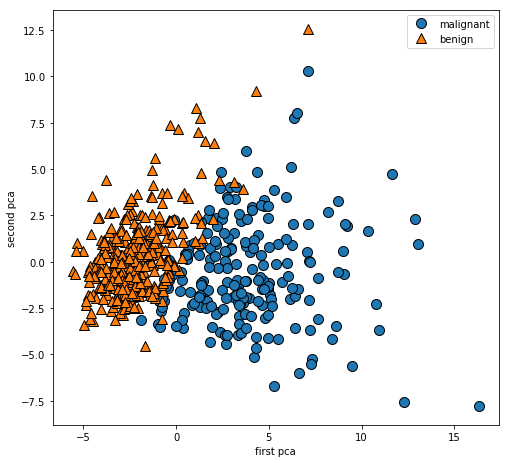

In [22]:
import mglearn 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(["malignant", "benign"], loc="best") 
plt.gca().set_aspect("equal") 
plt.xlabel("first pca") 
plt.ylabel("second pca")

In [23]:
 print("PCA : {}".format(pca.components_.shape)) 

PCA : (2, 30)


In [24]:
 print("PCA : {}".format(pca.components_))

PCA : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pca')

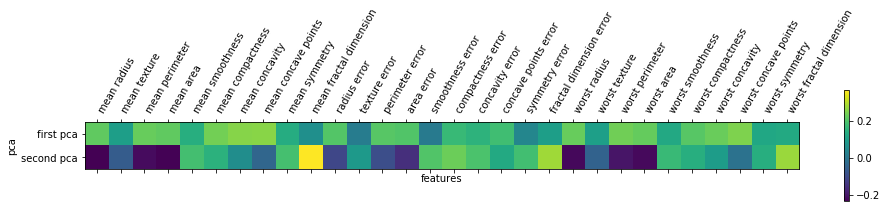

In [25]:
plt.matshow(pca.components_, cmap='viridis') 
plt.yticks([0, 1], ["first pca", "second pca"]) 
plt.colorbar() 
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("features") 
plt.ylabel("pca")


In [ ]:
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3)

In [26]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

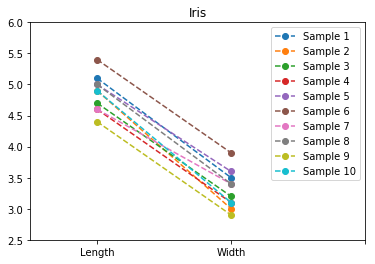

In [27]:
from sklearn.datasets import load_iris 
iris = load_iris() 
N = 10 # 10 
X = iris.data[:N, :2] #
plt.plot(X.T, 'o--') 
plt.xticks(range(4), ["Length", "Width"]) 
plt.xlim(-0.5, 2) 
plt.ylim(2.5, 6) 
plt.title("Iris") 
plt.legend(["Sample {}".format(i + 1) for i in range(N)]) 
plt.show()

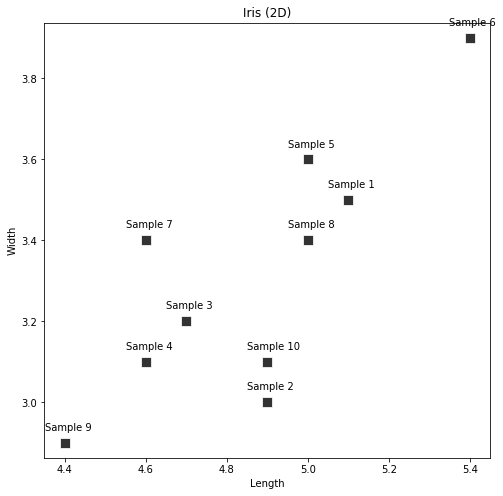

In [28]:
plt.figure(figsize=(8, 8)) 
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s") 
for i in range(N): 
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".format(i + 1))
plt.xlabel("Length") 
plt.ylabel("Width") 
plt.title("Iris (2D)")
plt.axis("equal")
plt.show()


In [29]:
pca1 = PCA(n_components=1) 
X_low = pca1.fit_transform(X) 
X2 = pca1.inverse_transform(X_low)

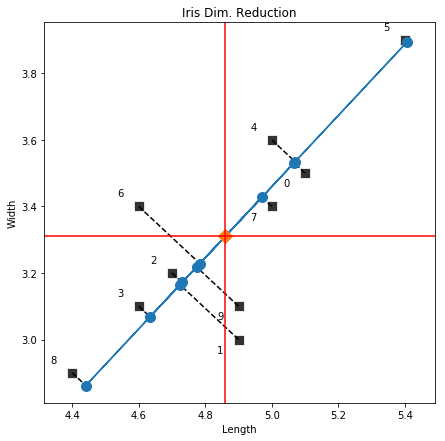

In [30]:
plt.figure(figsize=(7, 7)) 
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s") 

for i in range(N): 
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04 
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "{}".format(i))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--") 
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10) 
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D") 
plt.axvline(X[:, 0].mean(), c='r') 
plt.axhline(X[:, 1].mean(), c='r') 
plt.grid(False) 
plt.xlabel("Length") 
plt.ylabel("Width") 
plt.title("Iris Dim. Reduction") 
plt.axis("equal") 
plt.show()


In [31]:
X = iris.data[:, [2,3]] #2,3 
Y = iris.target

In [32]:
NUM = 100 
select = np.random.permutation(150) 
Xtr, Ytr = X[select[:NUM]], Y[select[:NUM]] 
Xte, Yte = X[select[NUM:]], Y[select[NUM:]] 
print(Xtr.shape) 
print(Xte.shape) 

(100, 2)
(50, 2)


In [33]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(Xtr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
def prn_pca(pca): 
    print('Components, Ratio, Eigen Value, Singular Value') 
    for c,r,e,s in zip(pca.components_, pca.explained_variance_ratio_, pca.explained_variance_, pca.singular_values_): 
        print('%s, %.3f, %.3f, %.3f' % (c, r, e, s))


In [35]:
prn_pca(pca)

Components, Ratio, Eigen Value, Singular Value
[0.91970652 0.39260656], 0.991, 3.752, 19.273
[-0.39260656  0.91970652], 0.009, 0.032, 1.785


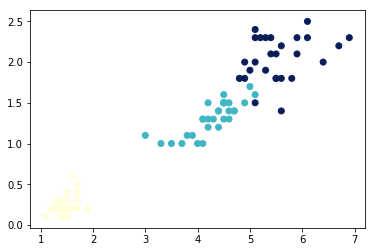

In [36]:
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='YlGnBu')

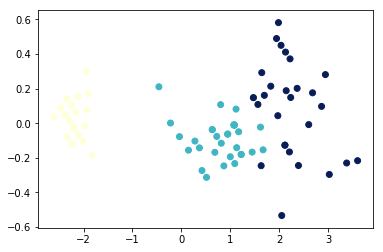

In [37]:
Xtr2 = pca.transform(Xtr) 
plt.scatter(Xtr2[:, 0], Xtr2[:, 1], c=Ytr, cmap='YlGnBu')
